<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preambule" data-toc-modified-id="Preambule-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preambule</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#gene-results" data-toc-modified-id="gene-results-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>gene results</a></span></li><li><span><a href="#merge" data-toc-modified-id="merge-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>merge</a></span></li></ul></li><li><span><a href="#GSEA:-ranks" data-toc-modified-id="GSEA:-ranks-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>GSEA: ranks</a></span></li><li><span><a href="#FGSEA-per-gene" data-toc-modified-id="FGSEA-per-gene-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>FGSEA per gene</a></span><ul class="toc-item"><li><span><a href="#Format" data-toc-modified-id="Format-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Format</a></span></li><li><span><a href="#Run-fgsea" data-toc-modified-id="Run-fgsea-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Run fgsea</a></span></li><li><span><a href="#plot" data-toc-modified-id="plot-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>plot</a></span></li></ul></li><li><span><a href="#FGSEA-per-gene,-Gini-ranking" data-toc-modified-id="FGSEA-per-gene,-Gini-ranking-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>FGSEA per gene, Gini ranking</a></span><ul class="toc-item"><li><span><a href="#Run-fgsea" data-toc-modified-id="Run-fgsea-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Run fgsea</a></span></li><li><span><a href="#plot" data-toc-modified-id="plot-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>plot</a></span></li></ul></li><li><span><a href="#FGSEA-per-function" data-toc-modified-id="FGSEA-per-function-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>FGSEA per function</a></span><ul class="toc-item"><li><span><a href="#Format" data-toc-modified-id="Format-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Format</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#plot" data-toc-modified-id="plot-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>plot</a></span></li></ul></li><li><span><a href="#Plot" data-toc-modified-id="Plot-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Plot</a></span><ul class="toc-item"><li><span><a href="#gini,-gene-function" data-toc-modified-id="gini,-gene-function-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>gini, gene function</a></span></li><li><span><a href="#endoR,-gene-and-general-function" data-toc-modified-id="endoR,-gene-and-general-function-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>endoR, gene and general function</a></span></li></ul></li></ul></div>

# Preambule

In [1]:
library(dplyr)
library(tidyverse)
library(ggplot2)
library(data.table)
library(stringr)
library(fgsea)
library(ggpubr)
library(viridis)
library(qs)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ stringr 1.4.0
✔ tidyr   1.1.2     ✔ forcats 0.5.0
✔ readr   1.4.0     

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: viridisLite

qs v0.23.4.

In [2]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Methanogen_SCFA/Metagenomes_methanogen/envs/r-ml/lib/libopenblasp-r0.3.10.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] qs_0.23.4         viridis_0.5.1     viridisLite_0.3.0 ggpubr_0.4.0     
 [5] fgsea_1.16.0      data.table_1.13.4 forcats_0.5.0     stringr_1.4.0    
 [9] purrr_0.3.4       readr_1.4.0       tidyr_1.1.2       tibble_3.0.4     
[13] ggplot2_3.3.2     tidyverse_1.3.0  

# Load

## gene results

In [3]:
annot <- qread('HydDB_res_r.qs') %>% subset(hyd_ctg != 'None') %>% #select(-pred_function) %>%
            mutate_at(vars(pred_general), str_replace, pattern = '-', replacement = ' ')

In [4]:
annot$pred_general[annot$hyd_ctg == '[NiFe] Group 3c'] <- 'H2 uptake'

In [5]:
annot %>% head(3)

hyd_ctg,pident,r_copies,Feature,Gini,endoR,pred_function,electron_donor_acceptor,O2,pred_general
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
[NiFe] Group 1f,72.150,4.675707e-06,s_Urmitella_timonensis,0,0,H2-uptake,Other,tolerant,H2 uptake
[NiFe] Group 1f,73.130,4.385363e-06,s_Varibaculum_cambriense_A,0,0,H2-uptake,Other,tolerant,H2 uptake
[FeFe] Group A1,66.625,2.011948e-06,s_Actinotalea_carbonis,0,0,Evolving,Ferredoxin,labile,H2 producing


In [6]:
hyd_descriptions <- read.table('hydDB_curated.txt', sep = '\t', header = TRUE)

In [7]:
hyd_descriptions %>% head(3)

,hyd_ctg,pred_function,electron_donor_acceptor,O2,comment
,<chr>,<chr>,<chr>,<chr>,<chr>
1,[Fe],Bidirectional,Hmd,tolerant,Reduction of Hmd during hydrogenotrophic methanogenesis
2,[FeFe] Group A1,Evolving,Ferredoxin,labile,
3,[FeFe] Group A2,H2-uptake,NAD,labile,


In [9]:
dsr <- qread('Fungene_dmnd_pergene_r.qs') %>% rename('endoR' = importance)

In [10]:
head(dsr, 3)

dmnd_ctg,pident,r_copies,Feature,Gini,endoR,pred_general
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
dsrB,68.90000,7.090777e-07,s_QIAA01_sp003224905,NA,NA,SRB
dsrB,50.00000,2.977571e-07,s_OLB17_sp002360555,NA,NA,SRB
dsrB,53.33333,1.188200e-06,s_F0332_sp001652275,NA,NA,SRB


In [13]:
ace <- qread( 'Acetobase_res_r.qs') %>% rename('endoR' = importance) %>% add_column(pred_general = 'Acetogen')

In [14]:
head(ace, 3)

V5,pident,r_copies,Feature,Gini,endoR,pred_general
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
fhs,93.85,2.977571e-06,s_OLB17_sp002360555,NA,NA,Acetogen
fhs,77.18,2.923960e-06,s_Actinomyces_gerencseriae,NA,NA,Acetogen
fhs,77.52,4.533657e-06,s_Actinomyces_graevenitzii,NA,NA,Acetogen


## merge

In [15]:
data <- annot %>% select(-electron_donor_acceptor, -O2, -pred_function) %>% rename('gene' = hyd_ctg) %>% 
            union(dsr %>% rename('gene' = dmnd_ctg)) %>% 
            union(ace %>% rename('gene' = V5)) %>% subset(gene != 'None')

In [16]:
data$pred_general <- str_replace(data$pred_general, pattern = '-', replacement = ' ')

In [17]:
tmpFun <- function(x){ifelse(is.na(x), 0, x)}
data <- data %>% mutate_at(vars(Gini, endoR, pident), tmpFun)

In [18]:
tail(data)

gene,pident,r_copies,Feature,Gini,endoR,pred_general
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
fhs,64.32727,4.143829e-06,f_UBA1407,0,0,Acetogen
fhs,50.60000,2.549191e-07,f_UBA1829,0,0,Acetogen
fhs,52.51759,1.915888e-07,f_Victivallaceae,0,0,Acetogen
fhs,0.00000,0.000000e+00,f_CAG_312,0,0,Acetogen
fhs,0.00000,0.000000e+00,f_UBA1096,0,0,Acetogen
fhs,90.50935,3.595571e-06,f_Akkermansiaceae,0,0,Acetogen


# GSEA: ranks

In [19]:
tmp <- data %>% select(Feature, endoR) %>% unique
# creating rank vector
ranks <- tmp$endoR
names(ranks) <- tmp$Feature
ranks %>% head

s_Urmitella_timonensis   s_Varibaculum_cambriense_A 
                           0                            0 
      s_Actinotalea_carbonis        s_Frankia_sp900197875 
                           0                            0 
s_Corynebacterium_amycolatum      s_Corynebacterium_durum 
                           0                            0

In [20]:
tmp <- data %>% select(Feature, Gini) %>% unique
# creating rank vector
ranks_gini <- tmp$Gini
names(ranks_gini) <- tmp$Feature
ranks_gini %>% head

s_Urmitella_timonensis   s_Varibaculum_cambriense_A 
                           0                            0 
      s_Actinotalea_carbonis        s_Frankia_sp900197875 
                           0                            0 
s_Corynebacterium_amycolatum      s_Corynebacterium_durum 
                           0                            0

# FGSEA per gene

## Format

In [22]:
# for each gene, select taxa that have >=1 gene copy
feat_class <- list()
for (hyd in unique(data$gene)){
    feat_class[[hyd]] <- data %>% subset(gene == hyd & r_copies > 0, select = Feature) %>% unlist %>% unique
}

In [23]:
length(feat_class)
lapply(feat_class, length) %>% unlist %>% summary
names(feat_class) #%>% head

[1] 34

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.0    16.5    51.0   363.3   339.5  2899.0 

[1] "[NiFe] Group 1f" "[FeFe] Group A1" "[NiFe] Group 3b" "[NiFe] Group 1h"
 [5] "[NiFe] Group 2a" "[FeFe] Group B"  "[FeFe] Group A2" "[FeFe] Group A3"
 [9] "[FeFe] Group C1" "[FeFe] Group C3" "[NiFe] Group 4e" "[NiFe] Group 4a"
[13] "[NiFe] Group 1i" "[NiFe] Group 1d" "[NiFe] Group 1e" "[NiFe] Group 3d"
[17] "[NiFe] Group 1b" "[NiFe] Group 2d" "[NiFe] Group 4g" "[FeFe] Group C2"
[21] "[NiFe] Group 1a" "[NiFe] Group 4c" "[FeFe] Group A4" "[NiFe] Group 4f"
[25] "[NiFe] Group 3a" "[NiFe] Group 4d" "[NiFe] Group 4h" "[NiFe] Group 2b"
[29] "[NiFe] Group 1c" "[NiFe] Group 2c" "[NiFe] Group 3c" "dsrB"           
[33] "dsrA"            "fhs"

## Run fgsea

In [19]:
# feature enrichment analysis
set.seed(0411)
fgseaRes_class <- fgsea(pathways = feat_class, stats = ranks, minSize = 10, eps = 1e-30) 

Warning message in fgseaMultilevel(...):
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”
Warning message in fgseaMultilevel(...):
“For some pathways, in reality P-values are less than 1e-30. You can set the `eps` argument to zero for better estimation.”


In [20]:
leading_edges_class <- lapply(fgseaRes_class$leadingEdge,function(x){unlist(strsplit(x, split = ' , '))})
names(leading_edges_class) <- fgseaRes_class$pathway

In [21]:
fgseaRes_class <- fgseaRes_class %>% select(-leadingEdge) %>% 
            left_join(data %>% select(gene,pred_general) %>% unique, by = c('pathway' = 'gene')) 

In [22]:
fgseaRes_class %>% head
summary(fgseaRes_class$pval)
summary(fgseaRes_class$padj)

pathway,pval,padj,log2err,ES,NES,size,pred_general
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
[FeFe] Group A1,2.634917e-08,8.197518e-08,0.73376199,1.0000000,1.007470,2573,H2 producing
[FeFe] Group A2,5.471125e-01,6.563600e-01,0.04216194,0.9934174,1.012020,419,H2 uptake
[FeFe] Group A3,3.755307e-03,8.762382e-03,0.43170770,0.9968465,1.003872,1211,H2 producing
[FeFe] Group A4,3.763780e-01,5.489764e-01,0.08152651,0.9940254,1.655120,48,H2 producing
[FeFe] Group B,2.534382e-03,6.451153e-03,0.43170770,0.9966216,1.003779,1401,H2 producing
[FeFe] Group C1,3.193018e-01,5.259089e-01,0.06799226,0.9948746,1.023522,358,Sensory


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.2329  0.2559  0.4597  0.7786 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.4485  0.3298  0.5947  0.7786 

In [23]:
cat( c('Significant: ', sum(fgseaRes_class$padj < 0.05)) )
cat( c('\nNot significant: ', sum(fgseaRes_class$padj >= 0.05)) )

Significant:  12
Not significant:  16

In [24]:
fgseaRes_class %>% subset(padj < 0.05) %>%
    arrange(-ES)

pathway,pval,padj,log2err,ES,NES,size,pred_general
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
[FeFe] Group A1,2.634917e-08,8.197518e-08,0.7337620,1.0000000,1.007470,2573,H2 producing
fhs,4.625274e-04,1.295077e-03,0.4984931,0.9991424,1.006625,2899,Acetogen
[FeFe] Group A3,3.755307e-03,8.762382e-03,0.4317077,0.9968465,1.003872,1211,H2 producing
[FeFe] Group B,2.534382e-03,6.451153e-03,0.4317077,0.9966216,1.003779,1401,H2 producing
[NiFe] Group 1d,1.000000e-30,3.500000e-30,NA,-0.2976365,-4.178178,170,H2 uptake
[NiFe] Group 2a,1.000000e-30,3.500000e-30,NA,-0.3578056,-2.227374,29,H2 uptake
[NiFe] Group 3d,1.000000e-30,3.500000e-30,NA,-0.3848417,-2.481027,31,Bidirectional
[NiFe] Group 4f,1.000000e-30,3.500000e-30,NA,-0.4350185,-1.638478,10,H2 producing
[NiFe] Group 4a,1.000000e-30,3.500000e-30,NA,-0.4364875,-7.937320,284,H2 producing


## plot

In [25]:
fgseaRes_class$pathway <- factor(fgseaRes_class$pathway, levels = fgseaRes_class$pathway[order(fgseaRes_class$ES)])

In [26]:
signif <- fgseaRes_class$pathway[which(fgseaRes_class$padj < 0.05)]
signif <- which(levels(fgseaRes_class$pathway) %in% signif)

In [27]:
dat_perclass <- left_join(fgseaRes_class, hyd_descriptions %>% select(-comment, -pred_function), by = c('pathway'='hyd_ctg'))
dat_perclass$O2[is.na(dat_perclass$O2)] <- 'NA'
dat_perclass$pathway <- factor(dat_perclass$pathway, levels = dat_perclass$pathway[order(dat_perclass$ES)])
dat_perclass$O2 <- factor(dat_perclass$O2, levels = c('labile', 'sensitive', 'sensitive or tolerant', 'tolerant', 'tolerant or insensitive', 'NA'))

In [28]:
dat_perclass$electron_short <- dat_perclass$electron_donor_acceptor
dat_perclass$electron_short[ dat_perclass$pred_general %in% c('SRB', 'Acetogen') ] <- 'NA'
dat_perclass$electron_short[ str_detect(dat_perclass$electron_short, pattern = 'ulfate')  ] <- 'Sulfate or others'
dat_perclass$electron_short[ dat_perclass$electron_short == 'O2 or fumarate'  ] <- 'O2'
dat_perclass$electron_short[ is.na(dat_perclass$electron_short) ] <- 'Unknown'
dat_perclass$electron_short[ str_detect(dat_perclass$electron_short, pattern = ' ferredoxin') ] <- 'Ferredoxin and other'

In [29]:
dat_perclass$electron_short %>% unique

[1] "Ferredoxin"           "NAD"                  "Ferredoxin and other"
 [4] "Formate"              "Unknown"              "Sulfate or others"   
 [7] "O2"                   "NADP"                 "Carbon monoxide"     
[10] "NA"

In [30]:
dat_perclass$electron_short <- factor(dat_perclass$electron_short
       , levels = c('Ferredoxin', 'NAD', 'NADP', 'Ferredoxin and other'
                     , 'Formate', 'Sulfate or others', 'O2', 'Carbon monoxide'
                     , 'Unknown', 'NA'))

In [31]:
breaks <- c('Acetogen', 'SRB', 'H2 producing', 'H2 uptake', 'Bidirectional', 'Sensory'  
            , levels(dat_perclass$O2), levels(dat_perclass$electron_short))

In [32]:
breaks

[1] "Acetogen"                "SRB"                    
 [3] "H2 producing"            "H2 uptake"              
 [5] "Bidirectional"           "Sensory"                
 [7] "labile"                  "sensitive"              
 [9] "sensitive or tolerant"   "tolerant"               
[11] "tolerant or insensitive" "NA"                     
[13] "Ferredoxin"              "NAD"                    
[15] "NADP"                    "Ferredoxin and other"   
[17] "Formate"                 "Sulfate or others"      
[19] "O2"                      "Carbon monoxide"        
[21] "Unknown"                 "NA"

In [33]:
cols <- c(magma(6)#magma(length(unique(dat_perclass$pred_general)))
          , viridis(5)#length(unique(dat_perclass$O2)))[-1]
          , 'grey70'
          , inferno(8)#length(unique(dat_perclass$electron_short)[-2]))
          , 'grey50', 'grey70')

In [34]:
length(cols)
length(breaks)

[1] 22

[1] 22

In [38]:
dat_perclass %>% subset(str_detect(pathway, '3c'))

pathway,pval,padj,log2err,ES,NES,size,pred_general,electron_donor_acceptor,O2,electron_short
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<fct>,<fct>
[NiFe] Group 3c,1e-30,3.5e-30,NA,-0.5322461,-2.6865,18,H2uptake,heterodisulfide and ferredoxin,tolerant,Ferredoxin and other


In [39]:
dat_perclass$pred_general[dat_perclass$pathway == '[NiFe] Group 3c'] <- 'H2 uptake'

In [40]:
p_per_class <- ggplot(data = dat_perclass, aes(x = pathway, y = ES, fill = pred_general)) +
    geom_bar(stat='identity') +
    labs(x = 'Gene class', y= 'Effect size') +
    coord_flip()+
    annotate(geom = 'text', x = signif-0.5, y = -0.65, label = '*', size = 9)+

    geom_rect(aes(fill = dat_perclass$O2[order(dat_perclass$pathway)], ymin = 1.05, ymax = 1.15
                  , xmin = (1:nrow(dat_perclass)+0.3), xmax = (1:nrow(dat_perclass)-0.3) ))+

geom_rect(aes(fill = dat_perclass$electron_short[order(dat_perclass$pathway)], ymin = 1.2, ymax = 1.3
              , xmin = (1:nrow(dat_perclass)+0.3), xmax = (1:nrow(dat_perclass)-0.3) ))+

scale_fill_manual(breaks = breaks
                  , values = cols
                  , 'Gene function')+
labs(title = 'endoR importance, GSEA per gene')+
theme_bw() + 
theme(axis.text.x = element_text(size = rel(1.2))
      , axis.text.y = element_text(size = rel(1.2))
      , legend.text = element_text(size = rel(1))
      , legend.title = element_text(size = rel(1.2), vjust = 0.85)
      )

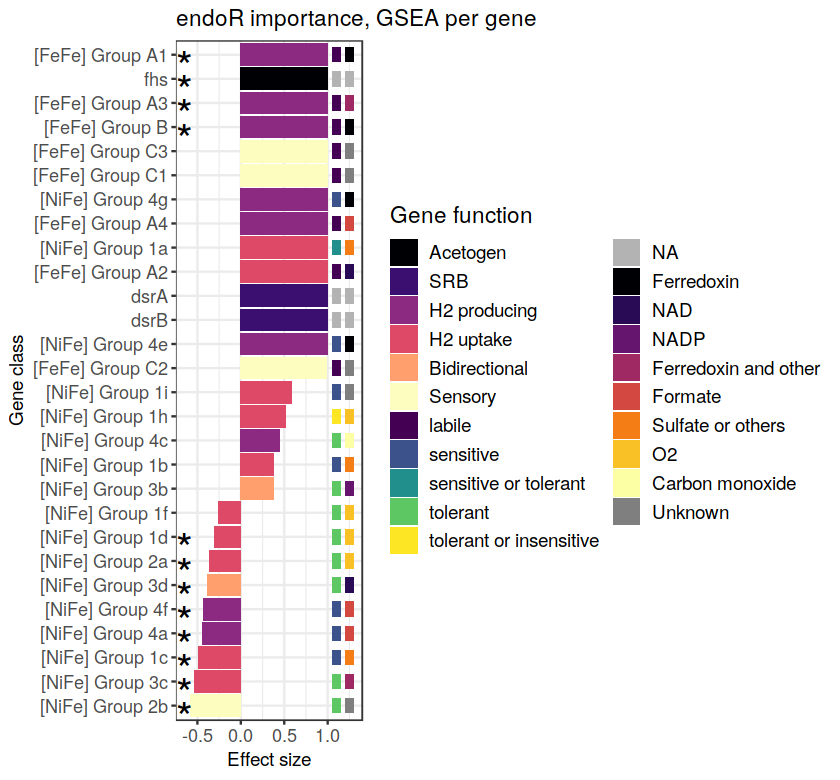

In [41]:
options(repr.plot.width=7, repr.plot.height=6.5)
p_per_class

In [42]:
ggsave(p_per_class, filename = '/ebio/abt3_projects/Methanogen_SCFA/Metagenomes_methanogen/Methanogens/Figures/fgsea_gene.pdf'
       , device = cairo_pdf, dpi = 300, width = 7, height = 7)

# FGSEA per gene, Gini ranking

## Run fgsea

In [57]:
# feature enrichment analysis
set.seed(0411)
fgseaRes_class_gini <- fgsea(pathways = feat_class, stats = ranks_gini, minSize = 10, eps = 1e-30) 

In [ ]:
leading_edges_class_gini <- lapply(fgseaRes_class_gini$leadingEdge,function(x){unlist(strsplit(x, split = ' , '))})
names(leading_edges_class_gini) <- fgseaRes_class_gini$pathway

In [ ]:
fgseaRes_class_gini <- fgseaRes_class_gini %>% select(-leadingEdge) %>% 
            left_join(data %>% select(gene,pred_general) %>% unique, by = c('pathway' = 'gene')) 

In [ ]:
cat( c('Significant: ', sum(fgseaRes_class_gini$padj < 0.05)) )
cat( c('\nNot significant: ', sum(fgseaRes_class_gini$padj >= 0.05)) )

In [ ]:
fgseaRes_class_gini %>% subset(padj < 0.05) %>%
    arrange(-ES)

## plot

In [ ]:
fgseaRes_class_gini$pathway <- factor(fgseaRes_class_gini$pathway
                                      , levels = fgseaRes_class_gini$pathway[order(fgseaRes_class_gini$ES)])

In [ ]:
signif_gini <- fgseaRes_class_gini$pathway[which(fgseaRes_class_gini$padj < 0.05)]
signif_gini <- which(levels(fgseaRes_class_gini$pathway) %in% signif_gini)

In [45]:
dat_perclass_gini <- left_join(fgseaRes_class_gini, hyd_descriptions %>% select(-comment, -pred_function), by = c('pathway'='hyd_ctg'))
dat_perclass_gini$O2[is.na(dat_perclass_gini$O2)] <- 'NA'
dat_perclass_gini$pathway <- factor(dat_perclass_gini$pathway, levels = dat_perclass_gini$pathway[order(dat_perclass_gini$ES)])
dat_perclass_gini$O2 <- factor(dat_perclass_gini$O2, levels = c('labile', 'sensitive', 'sensitive or tolerant', 'tolerant', 'tolerant or insensitive', 'NA'))

In [73]:
breaks_gini <- c('Acetogen', 'SRB', 'H2 producing', 'H2 uptake', 'Bidirectional', 'Sensory', 'NA'
            , levels(dat_perclass$O2))

In [74]:
breaks_gini

[1] "Acetogen"                "SRB"                    
 [3] "H2 producing"            "H2 uptake"              
 [5] "Bidirectional"           "Sensory"                
 [7] "NA"                      "labile"                 
 [9] "sensitive"               "sensitive or tolerant"  
[11] "tolerant"                "tolerant or insensitive"
[13] "NA"

In [75]:
cols_gini <- c(magma(6)#magma(length(unique(dat_perclass$pred_general)))
          , 'grey70', viridis(5)#length(unique(dat_perclass$O2)))[-1]
          , 'grey70'
          )

In [76]:
p_per_class_gini <- ggplot(data = dat_perclass_gini
                           , aes(x = pathway, y = ES, fill = pred_general)) +
    geom_bar(stat='identity') +
    labs(x = 'Gene class', y= 'Effect size') +
    coord_flip()+
    annotate(geom = 'text', x = signif_gini-0.5, y = -0.65, label = '*', size = 9)+
    geom_rect(aes(fill = dat_perclass_gini$O2[order(dat_perclass_gini$pathway)], ymin = 1.05, ymax = 1.125
                  , xmin = (1:nrow(dat_perclass_gini)+0.3), xmax = (1:nrow(dat_perclass_gini)-0.3) ))+
scale_fill_manual(breaks = breaks_gini, values = cols_gini, 'Gene function')+
labs(title = 'Gini importance, GSEA per gene')+
theme_bw() + 
theme(axis.text.x = element_text(size = rel(1.2), angle = 20, vjust = 1, hjust = 1)
      , axis.text.y = element_text(size = rel(1.2))
      , legend.text = element_text(size = rel(1))
      , legend.title = element_text(size = rel(1.2), vjust = 0.85)
      )

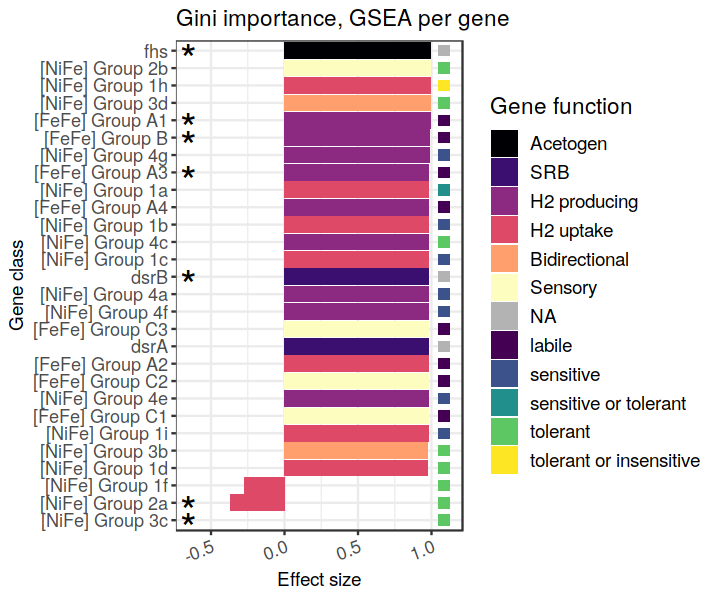

In [77]:
options(repr.plot.width=6, repr.plot.height=5)
p_per_class_gini

# FGSEA per function

## Format

In [58]:
unique(data$pred_general)

[1] "H2 uptake"     "H2 producing"  "Bidirectional" "Sensory"      
[5] "SRB"           "Acetogen"

In [60]:
feat_fun <- list()
for (hyd in unique(data$pred_general)){
    feat_fun[[ hyd ]] <- data %>% subset(pred_general == hyd & n_copies > 0
                                                          , select = Feature) %>% unlist %>% unique
}

In [61]:
length(feat_fun)
lapply(feat_fun, length) %>% unlist %>% summary
names(feat_fun) %>% head

[1] 6

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  102.0   753.8   945.5  1419.8  2429.5  2912.0 

[1] "H2 uptake"     "H2 producing"  "Bidirectional" "Sensory"      
[5] "SRB"           "Acetogen"

## Run

In [62]:
# feature enrichment analysis
set.seed(0411)
fgseaRes_fun <- fgsea(pathways = feat_fun, stats = ranks, minSize = 10, eps = 1e-30) 

Warning message in fgseaMultilevel(...):
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”
Warning message in fgseaMultilevel(...):
“For some pathways, in reality P-values are less than 1e-30. You can set the `eps` argument to zero for better estimation.”


In [63]:
leading_edges <- lapply(fgseaRes_fun$leadingEdge,function(x){unlist(strsplit(x, split = ' , '))})
names(leading_edges) <- fgseaRes_fun$pathway

In [64]:
leading_edges %>% names

[1] "Acetogen"      "Bidirectional" "H2 producing"  "H2 uptake"    
[5] "SRB"           "Sensory"

In [65]:
fgseaRes_fun <- fgseaRes_fun %>% select(-leadingEdge) %>% 
      left_join(data %>% select(gene,pred_general) %>% unique, by = c('pathway' = 'pred_general')) 

In [66]:
fgseaRes_fun %>% head(2)
summary(fgseaRes_fun$pval)
summary(fgseaRes_fun$padj)

pathway,pval,padj,log2err,ES,NES,size,gene
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
Acetogen,2.301273e-04,4.602545e-04,0.5188481,0.9991424,1.006653,2899,fhs
Bidirectional,1.000000e-30,6.000000e-30,NA,-0.2481335,-2.793140,102,[NiFe] Group 3b


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.1608  0.2855  0.6723  0.6723 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.2413  0.3023  0.6723  0.6723 

In [67]:
cat( c('Significant: ', sum(fgseaRes_fun$padj < 0.05)) )
cat( c('\nNot significant: ', sum(fgseaRes_fun$padj >= 0.05)) )

Significant:  15
Not significant:  19

In [68]:
fgseaRes_fun %>% subset(padj < 0.05) %>%
    arrange(-ES) %>% select(-gene) %>% unique

pathway,pval,padj,log2err,ES,NES,size
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
H2 producing,5.636918e-15,1.691075e-14,0.9969862,1.0000000,1.007506,2912
Acetogen,2.301273e-04,4.602545e-04,0.5188481,0.9991424,1.006653,2899
Bidirectional,1.000000e-30,6.000000e-30,NA,-0.2481335,-2.793140,102


## plot

In [69]:
tmp <- fgseaRes_fun %>% 
    arrange(-ES) %>% select(-gene) %>% unique

In [70]:
tmp$pathway <- factor(tmp$pathway, levels = tmp$pathway[order(-tmp$ES)])

In [71]:
tmp$pathway

[1] H2 producing  Acetogen      Sensory       SRB           H2 uptake    
[6] Bidirectional
Levels: H2 producing Acetogen Sensory SRB H2 uptake Bidirectional

In [72]:
p_fun <- ggplot(data = tmp, aes(x = pathway, y = ES, fill=ifelse(tmp$padj < 0.05, TRUE, FALSE)
                                )) +
    geom_bar(stat='identity') +
    scale_fill_viridis_d('Adj. P < 0.05')+
    labs(x = 'Gene function', y= 'Effect size', title = 'ES from endoR importance') +
    theme_classic()+
    #coord_cartesian(ylim = c(0.95, 1))+
    theme(axis.text.x = element_text(angle = 20, hjust = 1, vjust = 1))

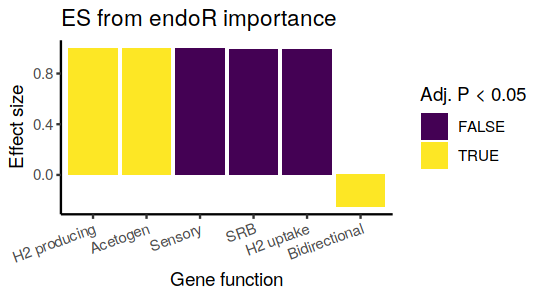

In [73]:
options(repr.plot.width=4.5, repr.plot.height=2.5)
p_fun

In [74]:
ggsave(p_fun, filename = '/ebio/abt3_projects/Methanogen_SCFA/Metagenomes_methanogen/Methanogens/Figures/fgsea_general.pdf'
       , device = cairo_pdf, dpi = 300, width = 4.5, height = 2.5)

# Plot

## gini, gene function

In [26]:
l_gini <- unique(data$Feature[order(-data$Gini)])

In [27]:
genes_gini_plot <- ggplot(data %>% subset(Gini > 0 & r_copies > 0)
              , aes(x = factor(Feature, levels = l_gini), y = pred_general, fill = r_copies)) + 
geom_tile(color = "white") + 
theme_classic() + 
theme(axis.text.y = element_text(size = rel(1.2))
      , axis.text.x = element_blank()
      , legend.text = element_text(size = rel(1))
      , legend.title = element_text(size = rel(1.2), vjust = 0.85)
      #, legend.position = 'None'
     ) + 

labs(x = "Feature", y = "Gene function"
     , title = "Selected features", fill = "Copy\nnumber") + 

scale_fill_viridis_c()

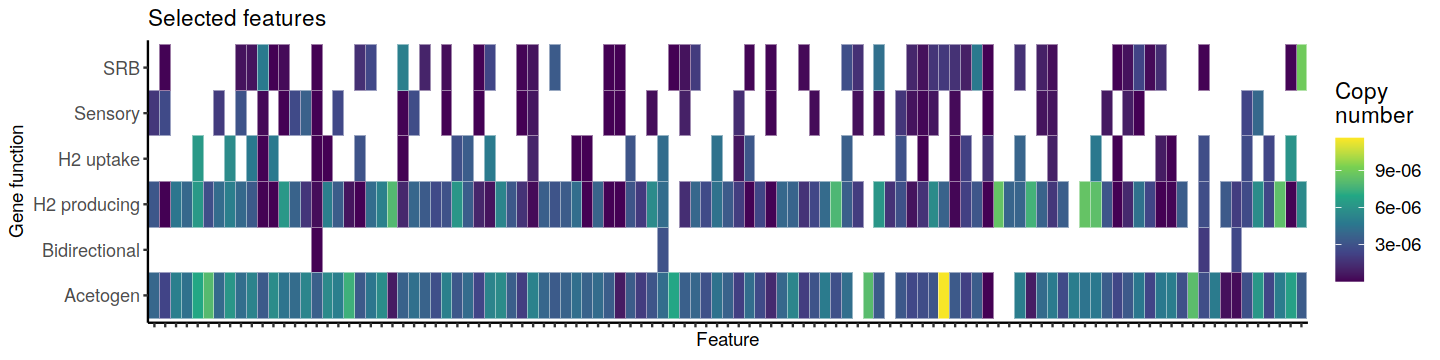

In [28]:
options(repr.plot.width=12, repr.plot.height=3)
genes_gini_plot

## endoR, gene and general function

In [29]:
tmp <- data %>% subset(endoR > 0 & r_copies > 0) %>% group_by(Feature, pred_general) %>% 
          summarise(r_copies = sum(r_copies)) %>% rename('x' = pred_general )
tmp <- rbind(tmp
             , data %>% subset(endoR > 0 & r_copies > 0) %>% select(Feature, gene, r_copies) %>% rename('x' = gene ))

`summarise()` regrouping output by 'Feature' (override with `.groups` argument)



In [30]:
tmp$x %>% unique %>% str_subset(pattern = 'FeFe')

[1] "[FeFe] Group A1" "[FeFe] Group A3" "[FeFe] Group B"  "[FeFe] Group C2"
[5] "[FeFe] Group C3" "[FeFe] Group C1" "[FeFe] Group A2" "[FeFe] Group A4"

In [31]:
tmp$x <- factor(tmp$x
   , levels = c('Acetogen', 'fhs'
                , 'SRB', 'dsrA', 'dsrB'
                , 'H2 producing', '[FeFe] Group A1', '[FeFe] Group B', '[FeFe] Group A3', '[FeFe] Group A4'
                                , '[NiFe] Group 4g', '[NiFe] Group 4e'
                , 'H2 uptake', '[NiFe] Group 1a', '[FeFe] Group A2', '[NiFe] Group 1i'
                , 'Bidirectional', '[NiFe] Group 3b'
                ,'Sensory', '[FeFe] Group C2', '[FeFe] Group C3', '[FeFe] Group C1'))

In [32]:
l_endor <- unique(data$Feature[order(data$endoR)])

In [39]:
genes_endor_plot <- ggplot(tmp
              , aes(y = factor(Feature, levels = l_endor), x = x, fill = r_copies)) + 
geom_tile(color = "white") + 
theme_classic() + 
theme(axis.text.x = element_text(size = rel(1.2), angle = 30, vjust = 1, hjust = 1)
      , axis.text.y = element_text(size = rel(1.2))
      , legend.text = element_text(size = rel(1))
      , legend.title = element_text(size = rel(1.2), vjust = 0.85)
      ) + 

geom_vline(xintercept = c(2.5, 5.5, 12.5,15.5), size = 1) +
geom_vline(xintercept = c(0.5, 2.5, 5.5, 12.5,15.5)+1, size = .5, color = 'grey80') +

labs(y = "Feature", x = "Gene function"
     , title = "endoR features", fill = "Ratio gene\ncopy number\nby genome size") + 

scale_fill_viridis_c()

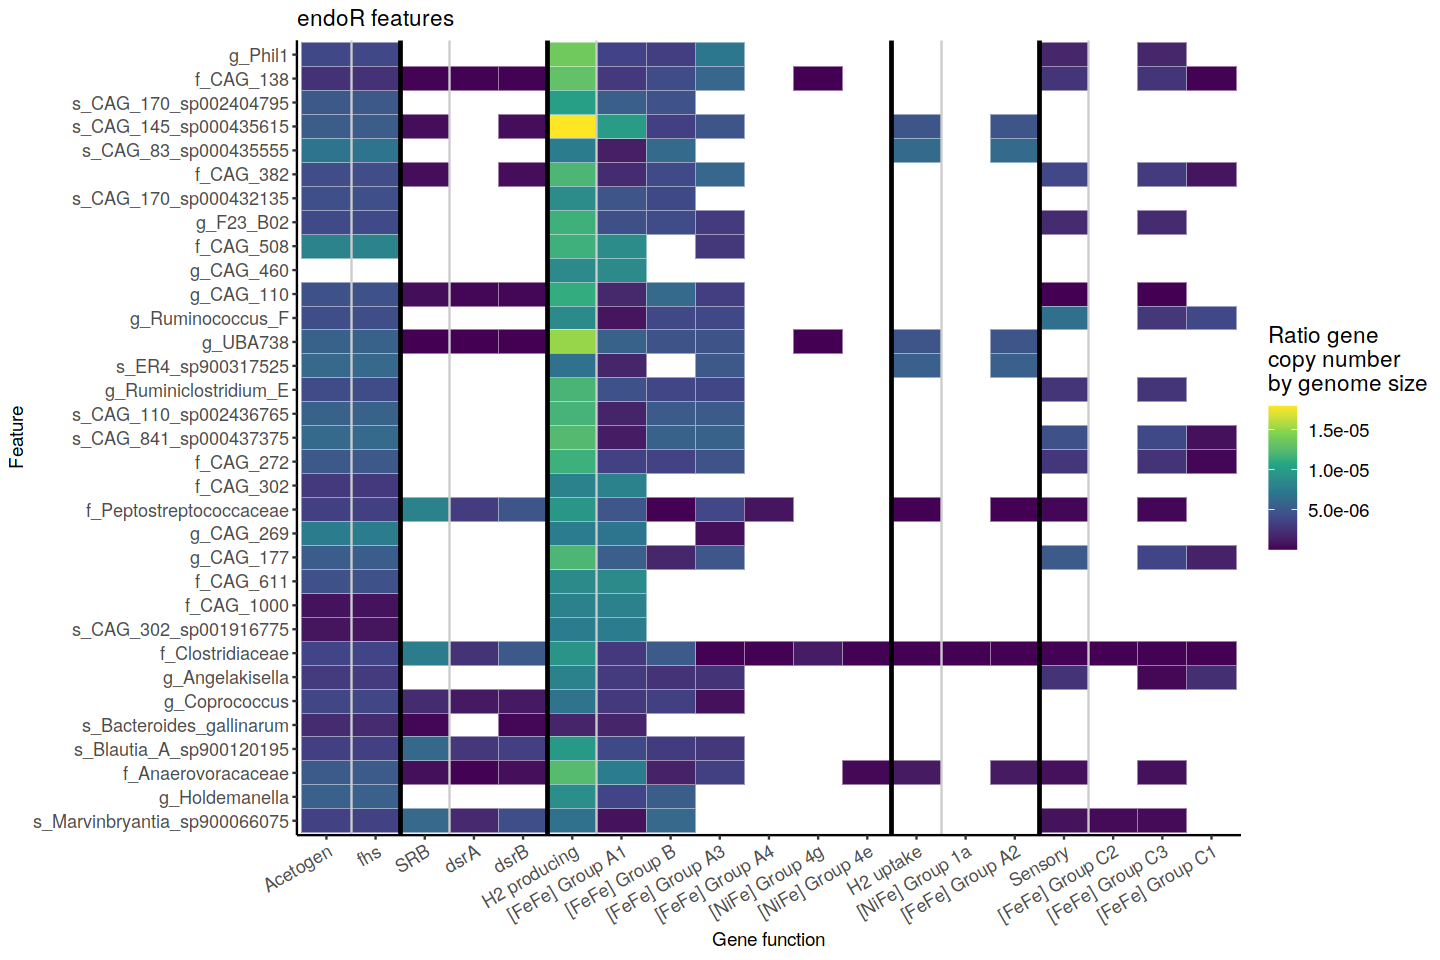

In [40]:
options(repr.plot.width=12, repr.plot.height=8)
genes_endor_plot

In [42]:
ggsave(genes_endor_plot, device = 'pdf', width = 12, height = 8, dpi = 300
        , filename = '/ebio/abt3_projects/Methanogen_SCFA/Metagenomes_methanogen/Methanogens/tmp/Supp_Mtbc_genes_genome.pdf')